In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data_clean.csv',index_col=0)
df

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [3]:
df.describe()

,Ozone,Solar.R,Wind,Day,Year,Temp
count,120.000000,151.000000,158.000000,158.000000,158.0,158.000000
mean,41.583333,185.403974,9.957595,16.006329,2010.0,77.727848
std,32.620709,88.723103,3.511261,8.997166,0.0,9.377877
min,1.000000,7.000000,1.700000,1.000000,2010.0,56.000000
25%,18.000000,119.000000,7.400000,8.000000,2010.0,72.000000
50%,30.500000,197.000000,9.700000,16.000000,2010.0,78.500000
75%,61.500000,257.000000,11.875000,24.000000,2010.0,84.000000
max,168.000000,334.000000,20.700000,31.000000,2010.0,97.000000


In [4]:
df.describe(include=object)

,Month,Weather
count,158,155
unique,6,3
top,9,S
freq,34,59


In [5]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [6]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [7]:
df['Month'].replace('May',5,inplace=True)

In [8]:
df['Month'].unique()

array(['5', 5, '6', '7', '8', '9'], dtype=object)

In [9]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [10]:
df['Month'].astype(int)


1      5
2      5
3      5
4      5
5      5
      ..
154    5
155    9
156    9
157    9
158    9
Name: Month, Length: 158, dtype: int32

In [11]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month       object
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [12]:
df['Month']=df['Month'].astype(int)


In [13]:
df.dtypes

Ozone      float64
Solar.R    float64
Wind       float64
Month        int32
Day          int64
Year         int64
Temp         int64
Weather     object
dtype: object

In [14]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [15]:
df.duplicated().sum()

1

In [16]:
df[df.duplicated()]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
157,14.0,191.0,14.3,9,28,2010,75,S


In [17]:
df[df.duplicated(keep=False)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,9,28,2010,75,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [18]:
df[(df['Ozone']==14.0)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
14,14.0,274.0,10.9,5,14,2010,68,S
16,14.0,334.0,11.5,5,16,2010,64,S
148,14.0,20.0,16.6,9,25,2010,63,PS
151,14.0,191.0,14.3,9,28,2010,75,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [19]:
# to show the value present in the columns
df[(df['Wind']==14.3)&(df['Temp']==75)&(df['Day']==28)]

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
151,14.0,191.0,14.3,9,28,2010,75,S
157,14.0,191.0,14.3,9,28,2010,75,S


In [20]:
#droping the duplicated row
df.drop_duplicates()

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
1,41.0,190.0,7.4,5,1,2010,67,S
2,36.0,118.0,8.0,5,2,2010,72,C
3,12.0,149.0,12.6,5,3,2010,74,PS
4,18.0,313.0,11.5,5,4,2010,62,S
5,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,2010,68,S
154,41.0,190.0,7.4,5,1,2010,67,C
155,30.0,193.0,6.9,9,26,2010,70,PS
156,NaN,145.0,13.2,9,27,2010,77,S


In [21]:
df.shape

(158, 8)

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
df.shape

(157, 8)

In [24]:
#dropping the dupliated colmn

In [25]:
df.drop(columns=['Year'],inplace=True)

In [26]:
df

,Ozone,Solar.R,Wind,Month,Day,Temp,Weather
1,41.0,190.0,7.4,5,1,67,S
2,36.0,118.0,8.0,5,2,72,C
3,12.0,149.0,12.6,5,3,74,PS
4,18.0,313.0,11.5,5,4,62,S
5,NaN,NaN,14.3,5,5,56,S
...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,30,68,S
154,41.0,190.0,7.4,5,1,67,C
155,30.0,193.0,6.9,9,26,70,PS
156,NaN,145.0,13.2,9,27,77,S


In [27]:
ranu=df.drop(columns=['Day'],inplace=True)
ranu

In [28]:
df

,Ozone,Solar.R,Wind,Month,Temp,Weather
1,41.0,190.0,7.4,5,67,S
2,36.0,118.0,8.0,5,72,C
3,12.0,149.0,12.6,5,74,PS
4,18.0,313.0,11.5,5,62,S
5,NaN,NaN,14.3,5,56,S
...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,68,S
154,41.0,190.0,7.4,5,67,C
155,30.0,193.0,6.9,9,70,PS
156,NaN,145.0,13.2,9,77,S


In [29]:
df.rename(columns={'Temp':'Ranu mense AAG'})

,Ozone,Solar.R,Wind,Month,Ranu mense AAG,Weather
1,41.0,190.0,7.4,5,67,S
2,36.0,118.0,8.0,5,72,C
3,12.0,149.0,12.6,5,74,PS
4,18.0,313.0,11.5,5,62,S
5,NaN,NaN,14.3,5,56,S
...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,68,S
154,41.0,190.0,7.4,5,67,C
155,30.0,193.0,6.9,9,70,PS
156,NaN,145.0,13.2,9,77,S


In [30]:
df.isna()

,Ozone,Solar.R,Wind,Month,Temp,Weather
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,True,True,False,False,False,False
...,...,...,...,...,...,...
153,False,False,False,False,False,False
154,False,False,False,False,False,False
155,False,False,False,False,False,False
156,True,False,False,False,False,False


In [31]:
df.isna().sum()

Ozone      38
Solar.R     7
Wind        0
Month       0
Temp        0
Weather     3
dtype: int64

<Axes: >

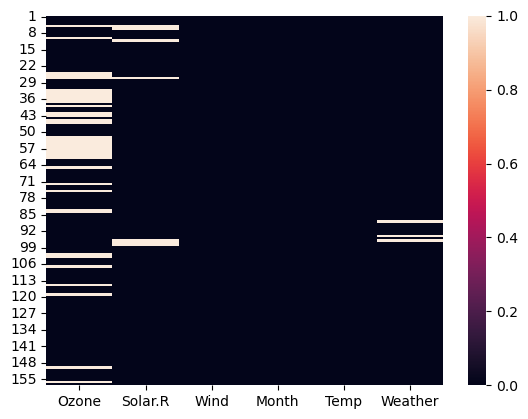

In [32]:
sns.heatmap(df.isna())

In [33]:
#precentage of missing value

In [34]:
df.isna().sum()

Ozone      38
Solar.R     7
Wind        0
Month       0
Temp        0
Weather     3
dtype: int64

In [35]:
for p in df.isna().sum():
 print(p/len(df)*100)

24.203821656050955
4.45859872611465
0.0
0.0
0.0
1.910828025477707


In [36]:
df.head()

,Ozone,Solar.R,Wind,Month,Temp,Weather
1,41.0,190.0,7.4,5,67,S
2,36.0,118.0,8.0,5,72,C
3,12.0,149.0,12.6,5,74,PS
4,18.0,313.0,11.5,5,62,S
5,NaN,NaN,14.3,5,56,S


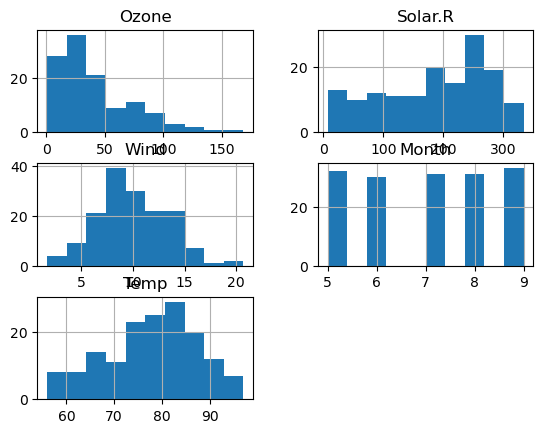

In [37]:
df.hist()
plt.show()

In [38]:
df['Ozone'].skew()

1.2720131447501268

<Axes: xlabel='Ozone'>

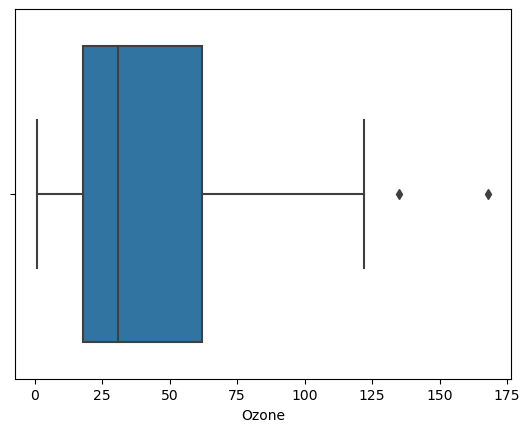

In [39]:
sns.boxplot(x=df['Ozone'])

In [40]:
median=df['Ozone'].median()
median

31.0

In [41]:
df['Ozone'].fillna(median,inplace=True)

In [42]:
df

,Ozone,Solar.R,Wind,Month,Temp,Weather
1,41.0,190.0,7.4,5,67,S
2,36.0,118.0,8.0,5,72,C
3,12.0,149.0,12.6,5,74,PS
4,18.0,313.0,11.5,5,62,S
5,31.0,NaN,14.3,5,56,S
...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,68,S
154,41.0,190.0,7.4,5,67,C
155,30.0,193.0,6.9,9,70,PS
156,31.0,145.0,13.2,9,77,S


In [43]:
df.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Month      0
Temp       0
Weather    3
dtype: int64

<Axes: xlabel='Solar.R'>

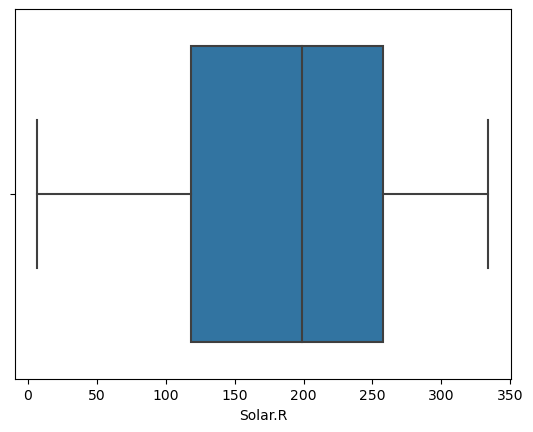

In [44]:
sns.boxplot(x=df['Solar.R'])

In [45]:
median=df['Solar.R'].median()
median

199.0

In [46]:
df['Solar.R'].fillna(median,inplace=True)

In [47]:
df.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Month      0
Temp       0
Weather    3
dtype: int64

In [48]:
mode=df['Weather'].mode()[0]
mode

'S'

In [49]:
df['Weather'].fillna(mode,inplace=True)

In [50]:
df.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Month      0
Temp       0
Weather    0
dtype: int64

# OUTLIER DETECTION

<Axes: >

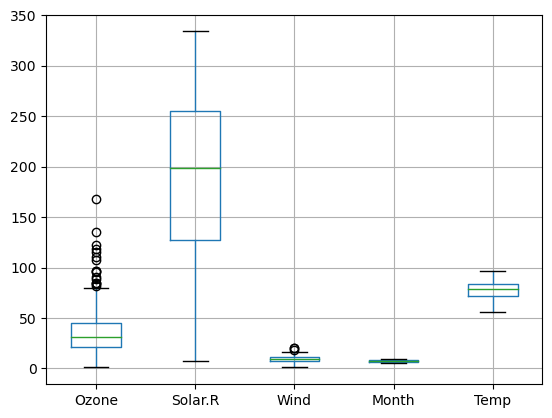

In [51]:
df.boxplot()

In [52]:
outelier_detection(df,'Wind')

NameError: name 'outelier_detection' is not defined

In [ ]:
df['Wind']>81.0

In [53]:
df[df['Wind']>81.0]

,Ozone,Solar.R,Wind,Month,Temp,Weather


In [54]:
df.loc[df['Wind']>81.0,'Wind']=81.0

<Axes: >

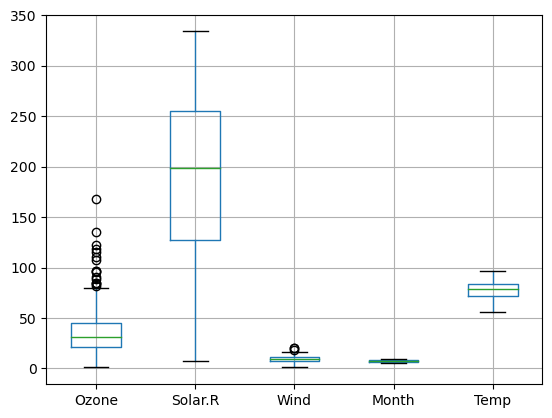

In [55]:
df.boxplot()

<Axes: xlabel='Wind'>

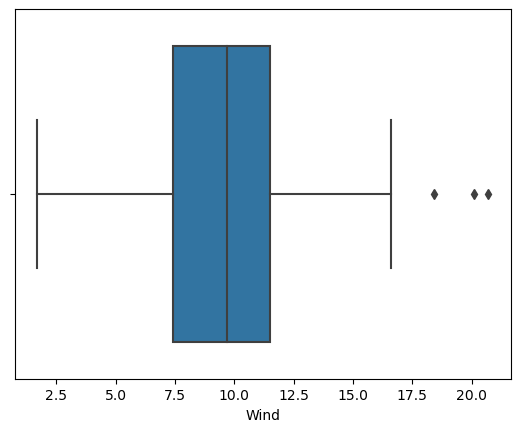

In [56]:



sns.boxplot(x=df['Wind'])

# SCATER POT AND CORELATION

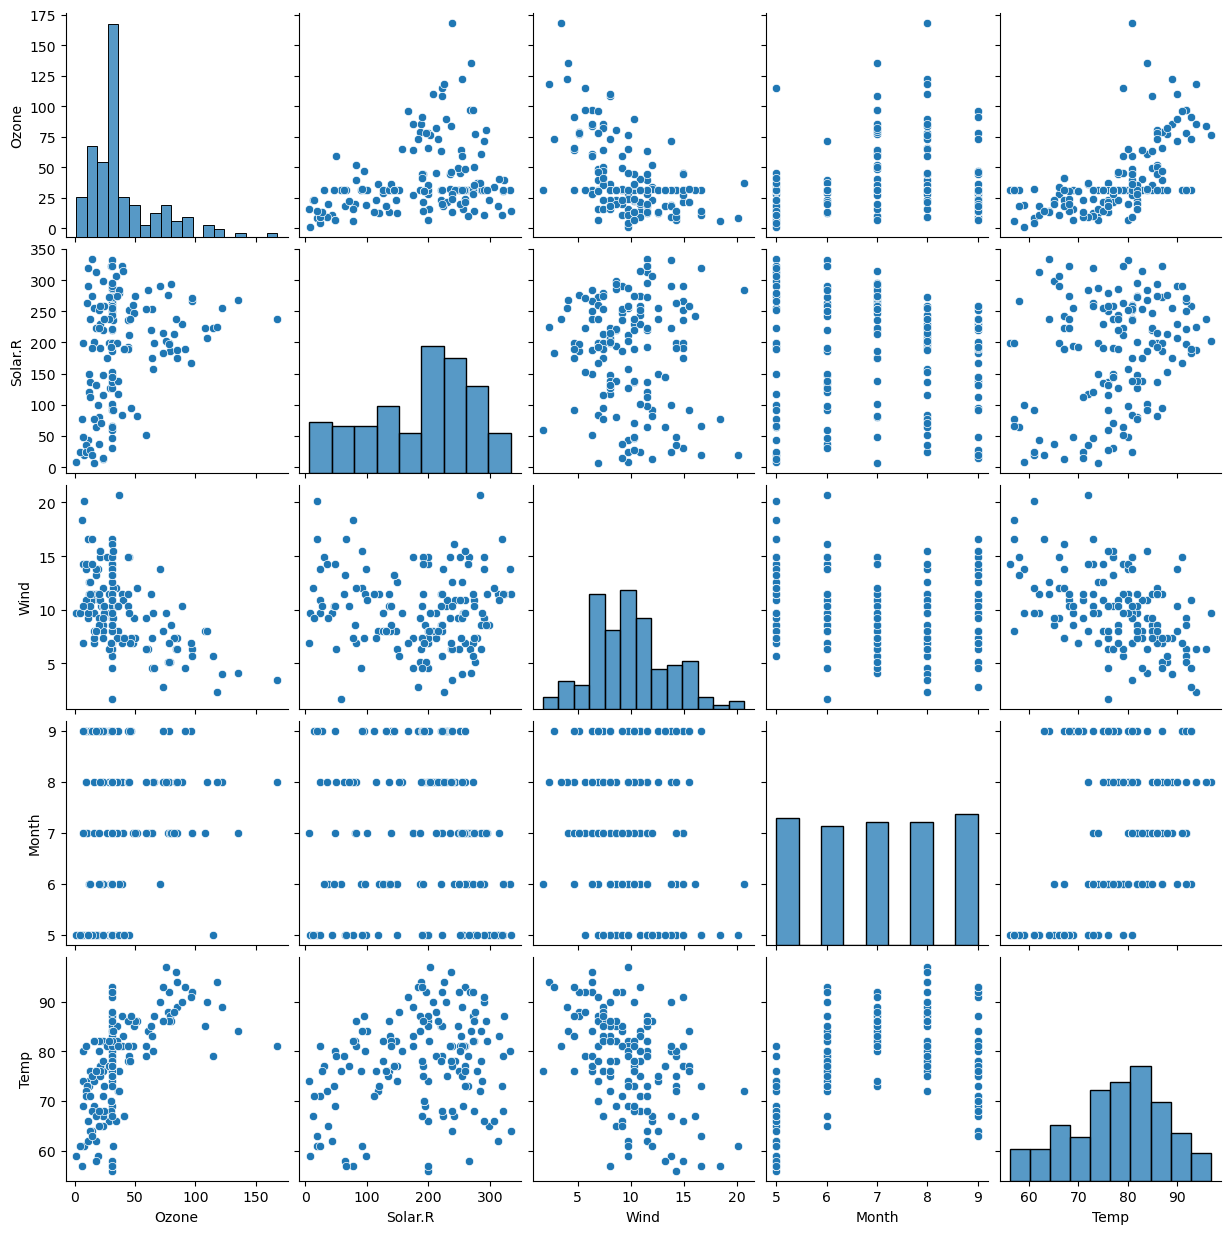

In [57]:
sns.pairplot(df)

In [58]:
df.corr()

,Ozone,Solar.R,Wind,Month,Temp
Ozone,1.000000,0.297561,-0.523738,0.171488,0.597087
Solar.R,0.297561,1.000000,-0.057709,-0.083788,0.256994
Wind,-0.523738,-0.057709,1.000000,-0.170328,-0.441228
Month,0.171488,-0.083788,-0.170328,1.000000,0.408060
Temp,0.597087,0.256994,-0.441228,0.408060,1.000000


<Axes: >

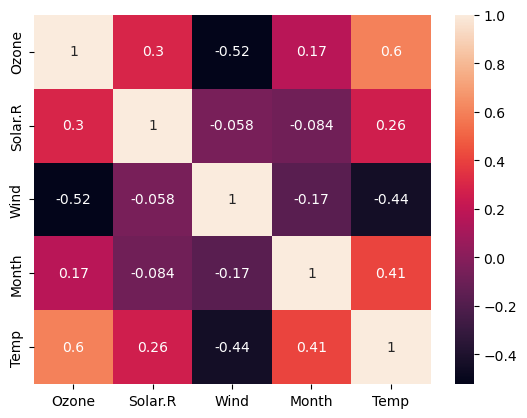

In [59]:
sns.heatmap(df.corr(),annot=True)

In [60]:
df.head()

,Ozone,Solar.R,Wind,Month,Temp,Weather
1,41.0,190.0,7.4,5,67,S
2,36.0,118.0,8.0,5,72,C
3,12.0,149.0,12.6,5,74,PS
4,18.0,313.0,11.5,5,62,S
5,31.0,199.0,14.3,5,56,S


In [61]:
df=pd.get_dummies(data=df,columns=['Weather'])
df

,Ozone,Solar.R,Wind,Month,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5,67,0,0,1
2,36.0,118.0,8.0,5,72,1,0,0
3,12.0,149.0,12.6,5,74,0,1,0
4,18.0,313.0,11.5,5,62,0,0,1
5,31.0,199.0,14.3,5,56,0,0,1
...,...,...,...,...,...,...,...,...
153,20.0,223.0,11.5,9,68,0,0,1
154,41.0,190.0,7.4,5,67,1,0,0
155,30.0,193.0,6.9,9,70,0,1,0
156,31.0,145.0,13.2,9,77,0,0,1


#  FETURE SCALLING THE DATA 
1.Staderdisation
2.Normalization

In [62]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [63]:
sc=StandardScaler()

In [64]:
df.head()

,Ozone,Solar.R,Wind,Month,Temp,Weather_C,Weather_PS,Weather_S
1,41.0,190.0,7.4,5,67,0,0,1
2,36.0,118.0,8.0,5,72,1,0,0
3,12.0,149.0,12.6,5,74,0,1,0
4,18.0,313.0,11.5,5,62,0,0,1
5,31.0,199.0,14.3,5,56,0,0,1


In [66]:
sc.fit_transform(df)

array([[ 0.06282803,  0.04639404, -0.72407878, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.11144761, -0.78341331, -0.55235617, ...,  1.48461498,
        -0.65366102, -0.79713027],
       [-0.94797067, -0.42613514,  0.76418385, ..., -0.67357531,
         1.52984494, -0.79713027],
       ...,
       [-0.32057837,  0.08096935, -0.86718096, ..., -0.67357531,
         1.52984494, -0.79713027],
       [-0.28572324, -0.47223555,  0.93590646, ..., -0.67357531,
        -0.65366102,  1.2545001 ],
       [-0.7388399 , -0.63358698, -0.55235617, ...,  1.48461498,
        -0.65366102, -0.79713027]])

In [70]:
x=pd.DataFrame(sc.fit_transform(df),columns=df.columns)
x

,Ozone,Solar.R,Wind,Month,Temp,Weather_C,Weather_PS,Weather_S
0,0.062828,0.046394,-0.724079,-1.412198,-1.146116,-0.673575,-0.653661,1.25450
1,-0.111448,-0.783413,-0.552356,-1.412198,-0.612802,1.484615,-0.653661,-0.79713
2,-0.947971,-0.426135,0.764184,-1.412198,-0.399476,-0.673575,1.529845,-0.79713
3,-0.738840,1.463982,0.449359,-1.412198,-1.679431,-0.673575,-0.653661,1.25450
4,-0.285723,0.150120,1.250731,-1.412198,-2.319408,-0.673575,-0.653661,1.25450
...,...,...,...,...,...,...,...,...
152,-0.669130,0.426722,0.449359,1.385469,-1.039454,-0.673575,-0.653661,1.25450
153,0.062828,0.046394,-0.724079,-1.412198,-1.146116,1.484615,-0.653661,-0.79713
154,-0.320578,0.080969,-0.867181,1.385469,-0.826128,-0.673575,1.529845,-0.79713
155,-0.285723,-0.472236,0.935906,1.385469,-0.079488,-0.673575,-0.653661,1.25450


In [71]:
x.describe()

,Ozone,Solar.R,Wind,Month,Temp,Weather_C,Weather_PS,Weather_S
count,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02,1.570000e+02
mean,-5.657187e-17,-1.018294e-16,-4.525750e-17,1.810300e-16,2.036587e-16,4.242891e-17,-8.485781e-18,-7.849347e-17
std,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00,1.003200e+00
min,-1.331377e+00,-2.062700e+00,-2.355444e+00,-1.412198e+00,-2.319408e+00,-6.735753e-01,-6.536610e-01,-7.971303e-01
25%,-6.342745e-01,-6.796874e-01,-7.240788e-01,-7.127815e-01,-6.128020e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
50%,-2.857232e-01,1.501200e-01,-6.580877e-02,-1.336465e-02,1.338381e-01,-6.735753e-01,-6.536610e-01,-7.971303e-01
75%,2.022485e-01,7.955257e-01,4.493591e-01,6.860522e-01,6.671525e-01,1.484615e+00,1.529845e+00,1.254500e+00
max,4.489429e+00,1.706009e+00,3.082439e+00,1.385469e+00,2.053770e+00,1.484615e+00,1.529845e+00,1.254500e+00


In [72]:
mn=MinMaxScaler()

In [73]:
mn.fit_transform(df)

array([[0.23952096, 0.55963303, 0.3       , ..., 0.        , 0.        ,
        1.        ],
       [0.20958084, 0.33944954, 0.33157895, ..., 1.        , 0.        ,
        0.        ],
       [0.06586826, 0.43425076, 0.57368421, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.17365269, 0.56880734, 0.27368421, ..., 0.        , 1.        ,
        0.        ],
       [0.17964072, 0.42201835, 0.60526316, ..., 0.        , 0.        ,
        1.        ],
       [0.10179641, 0.37920489, 0.33157895, ..., 1.        , 0.        ,
        0.        ]])

In [75]:
normalization=pd.DataFrame(mn.fit_transform(df),columns=df.columns)
normalization

,Ozone,Solar.R,Wind,Month,Temp,Weather_C,Weather_PS,Weather_S
0,0.239521,0.559633,0.300000,0.0,0.268293,0.0,0.0,1.0
1,0.209581,0.339450,0.331579,0.0,0.390244,1.0,0.0,0.0
2,0.065868,0.434251,0.573684,0.0,0.439024,0.0,1.0,0.0
3,0.101796,0.935780,0.515789,0.0,0.146341,0.0,0.0,1.0
4,0.179641,0.587156,0.663158,0.0,0.000000,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
152,0.113772,0.660550,0.515789,1.0,0.292683,0.0,0.0,1.0
153,0.239521,0.559633,0.300000,0.0,0.268293,1.0,0.0,0.0
154,0.173653,0.568807,0.273684,1.0,0.341463,0.0,1.0,0.0
155,0.179641,0.422018,0.605263,1.0,0.512195,0.0,0.0,1.0


In [76]:
normalization.describe()

,Ozone,Solar.R,Wind,Month,Temp,Weather_C,Weather_PS,Weather_S
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,0.228727,0.547323,0.433155,0.504777,0.530371,0.312102,0.299363,0.388535
std,0.172347,0.266192,0.184484,0.358584,0.229398,0.464834,0.459445,0.488977
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.119760,0.366972,0.300000,0.250000,0.390244,0.000000,0.000000,0.000000
50%,0.179641,0.587156,0.421053,0.500000,0.560976,0.000000,0.000000,0.000000
75%,0.263473,0.758410,0.515789,0.750000,0.682927,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# AUTO EDA

In [85]:
!pip install sweetviz

Defaulting to user installation because normal site-packages is not writeable


In [86]:
import sweetviz as sv

In [87]:
sv.analyze(df)

                                             |                                             | [  0%]   00:00 ->…